In [1]:
import sys
import torch
import pyro
sys.path.append('../')
sys.path.append('../Scripts')
import seaborn as sns
import matplotlib.pyplot as plt

from Scripts.model import *
from Scripts import bubble



In [2]:
datasets = { "bubble": ["Fig4"],
                "four_waystrandexchange": ["Table5.2"],
                "hairpin" : ["Fig4_0", "Fig4_1", "Fig6_0", "Fig6_1"], 
                "hairpin1" : ["Fig3_T_0", "Fig3_T_1"],
                "hairpin4" : ["Table1_0", "Table1_1"],
                "helix" : ["Fig6_0", "Fig6_1"],
                "helix1" : ["Fig6a"],
                "three_waystranddisplacement" : ["Fig3b"], 
                "three_waystranddisplacement1" : ["Fig6b"]
}
kinetic_model = "ARRHENIUS"
    
reaction_type = "bubble"
reaction_dataset = "Fig4"
PATH = 'C:/Users/jlovr/CS532-project/Probabilistic-Programming/Project/'

reaction_id = "/" + reaction_type + "/" + reaction_dataset
document_name = PATH + "/dataset" + reaction_id + ".csv"

data = open_csv(document_name)



In [3]:
def from_theta_to_rate(theta, data, row, kinetic_model="ARRHENIUS"):
    if data[row][0] != '':
        docID = "Altanbonnet" + str(row)
        flurPosition = 17
        real_log_10_rate = 1 / float(data[row][5])
        [error, predicted_log_10_rate, real_log_10_rate, stuctureCounterUniLocal, half_context_biLocal] = bubble.main(real_log_10_rate, theta, data[row][1].rstrip(),data[row][2].rstrip(),data[row][3].rstrip(), (1000/ float (data[row][4] ))-273.15, float (data[row][8] ), float (data[row][9] ), 0, flurPosition, reaction_id, docID, kinetic_model)
        return predicted_log_10_rate, real_log_10_rate

In [4]:
def oldmodel(data):

    theta_dim = 15

    # priors
    # theta_mean = [13.0580, 5, 17.0580, 5,  10.0580, 1, 1.0580, -2,  13.0580, 1, 5.0580, 0,  4.0580, -2,   0.0402 ]
    theta_mean = [13.0580, 3, 13.0580, 3,  13.0580, 3, 13.0580, 3,  13.0580, 3, 13.0580, 3,  13.0580, 3,   0.0402 ]
    theta = pyro.sample('theta', pyro.distributions.Normal(torch.tensor(theta_mean), torch.ones(theta_dim)))

    # likelihood
    len_data = 5

    for row in range(len_data):
        if row == 0:
            continue
        k, real, sq_error = from_theta_to_rate(theta, data, row)
        pyro.sample('obs_'+str(row), pyro.distributions.Normal(k, 1), obs=torch.tensor(real))

    return theta

In [5]:
def model(data):

    theta_dim = 15

    # priors
    # theta_mean = [13.0580, 5, 17.0580, 5,  10.0580, 1, 1.0580, -2,  13.0580, 1, 5.0580, 0,  4.0580, -2,   0.0402 ]
    theta_mean = [13.0580, 3, 13.0580, 3,  13.0580, 3, 13.0580, 3,  13.0580, 3, 13.0580, 3,  13.0580, 3,   0.0402 ]
    theta = pyro.sample('theta', pyro.distributions.Normal(torch.tensor(theta_mean), torch.ones(theta_dim)))

    for reaction_type in datasets:
        if reaction_type == "bubble":
            for reaction_dataset in datasets[reaction_type]:
                reaction_id = "/" + reaction_type + "/" + reaction_dataset
                document_name = PATH + "/dataset" + reaction_id + ".csv"
                file =  open_csv(document_name)
                row = 1
                while row < len(file) and file[row][0] != '' :
                    k, real, sq_error = estimate_AltanBonnet(row, theta, file, reaction_id, str(row), "Altanbonnet", kinetic_model)
                    pyro.sample('obs_'+reaction_type+"_"+reaction_dataset+"_"+str(row), pyro.distributions.Normal(k, 1), obs=torch.tensor(real))
                    row+=1
        if reaction_type == "four_waystrandexchange":
            for reaction_dataset in datasets[reaction_type]:
                reaction_id = "/" + reaction_type + "/" + reaction_dataset
                document_name = PATH + "/dataset" + reaction_id + ".csv"
                file =  open_csv(document_name)
                row = 1
                while row < len(file) and file[row][0] != '' :
                    k, real, sq_error = estimate_DabbyThesis(row, theta, file, reaction_id, str(row), "Dabby", kinetic_model)
                    pyro.sample('obs_'+reaction_type+"_"+reaction_dataset+"_"+str(row), pyro.distributions.Normal(k, 1), obs=torch.tensor(real))
                    row+=1
        if reaction_type == "hairpin":
            for reaction_dataset in datasets[reaction_type]:
                _zip = bool(int(reaction_dataset[-1]))
                j = reaction_dataset[-3]
                reaction_id = "/" + reaction_type + "/" + reaction_dataset
                document_name = PATH + "/dataset" + reaction_id + ".csv"
                file =  open_csv(document_name)
                row = 1
                while row < len(file) and file[row][0] != '' :
                    k, real, sq_error = estimate_Bonnet(row, theta, _zip, file, reaction_id, str(row), "Bonnet"+j, kinetic_model)
                    pyro.sample('obs_'+reaction_type+"_"+reaction_dataset+"_"+str(row), pyro.distributions.Normal(k, 1), obs=torch.tensor(real))
                    row+=1
        if reaction_type == "hairpin1":
            for reaction_dataset in datasets[reaction_type]:
                _zip = bool(int(reaction_dataset[-1]))
                reaction_id = "/" + reaction_type + "/" + reaction_dataset
                document_name = PATH + "/dataset" + reaction_id + ".csv"
                file =  open_csv(document_name)
                row = 1
                while row < len(file) and file[row][0] != '' :
                    k, real, sq_error = estimate_BonnetThesis(row, theta, _zip, file, reaction_id, str(row), "GoddardT", kinetic_model)
                    pyro.sample('obs_'+reaction_type+"_"+reaction_dataset+"_"+str(row), pyro.distributions.Normal(k, 1), obs=torch.tensor(real))
                    row+=1
        if reaction_type == "hairpin4":
            for reaction_dataset in datasets[reaction_type]:
                _zip = bool(int(reaction_dataset[-1]))
                reaction_id = "/" + reaction_type + "/" + reaction_dataset
                document_name = PATH + "/dataset" + reaction_id + ".csv"
                file =  open_csv(document_name)
                row = 1
                while row < len(file) and file[row][0] != '' :
                    k, real, sq_error = estimate_Kim(row, theta, _zip, file, reaction_id, str(row), "Kim", kinetic_model)
                    pyro.sample('obs_'+reaction_type+"_"+reaction_dataset+"_"+str(row), pyro.distributions.Normal(k, 1), obs=torch.tensor(real))
                    row+=1
        if reaction_type == "helix":
            for reaction_dataset in datasets[reaction_type]:
                _zip = bool(int(reaction_dataset[-1]))
                reaction_id = "/" + reaction_type + "/" + reaction_dataset
                document_name = PATH + "/dataset" + reaction_id + ".csv"
                file =  open_csv(document_name)
                row = 1
                while row < len(file) and file[row][0] != '' :
                    k, real, sq_error = estimate_Morrison(row, theta, _zip, file, reaction_id, str(row), "Morrison", kinetic_model)
                    pyro.sample('obs_'+reaction_type+"_"+reaction_dataset+"_"+str(row), pyro.distributions.Normal(k, 1), obs=torch.tensor(real))
                    row+=1
        if reaction_type == "helix1":
            for reaction_dataset in datasets[reaction_type]:
                _zip = False
                reaction_id = "/" + reaction_type + "/" + reaction_dataset
                document_name = PATH + "/dataset" + reaction_id + ".csv"
                file =  open_csv(document_name)
                row = 1
                while row < len(file) and file[row][0] != '' :
                    k, real, sq_error = estimate_ReynaldoDissociate(row, theta, _zip, file, reaction_id, str(row), "ReynaldoDissociate", kinetic_model)
                    pyro.sample('obs_'+reaction_type+"_"+reaction_dataset+"_"+str(row), pyro.distributions.Normal(k, 1), obs=torch.tensor(real))
                    row+=1
        if reaction_type == "three_waystranddisplacement":
            for reaction_dataset in datasets[reaction_type]:
                reaction_id = "/" + reaction_type + "/" + reaction_dataset
                document_name = PATH + "/dataset" + reaction_id + ".csv"
                file =  open_csv(document_name)
                row = 1
                while row < len(file) and file[row][0] != '' :
                    k, real, sq_error = estimate_Zhang(row, theta, file, reaction_id, str(row), "Zhang", kinetic_model)
                    pyro.sample('obs_'+reaction_type+"_"+reaction_dataset+"_"+str(row), pyro.distributions.Normal(k, 1), obs=torch.tensor(real))
                    row+=1
        if reaction_type == "three_waystranddisplacement1":
            for reaction_dataset in datasets[reaction_type]:
                reaction_id = "/" + reaction_type + "/" + reaction_dataset
                document_name = PATH + "/dataset" + reaction_id + ".csv"
                file =  open_csv(document_name)
                row = 1
                while row < len(file) and file[row][0] != '' :
                    k, real, sq_error = estimate_ReyanldoSequential(row, theta, file, reaction_id, str(row), "ReynaldoSequential", kinetic_model)
                    pyro.sample('obs_'+reaction_type+"_"+reaction_dataset+"_"+str(row), pyro.distributions.Normal(k, 1), obs=torch.tensor(real))
                    row+=1

    return theta

In [6]:
n_samples = 1000

# Importance Sampling

In [7]:
pyro.clear_param_store()
pyro.set_rng_seed(0)
# inference with importance sampling
importance = pyro.infer.Importance(model, guide=None, num_samples=n_samples)

print("doing importance sampling...")
emp_marginal = pyro.infer.EmpiricalMarginal(importance.run(data))

posterior_mean = emp_marginal.mean
posterior_std_dev = emp_marginal.variance.sqrt()

# report results
print(posterior_mean)
print(posterior_std_dev)
print("done.")

doing importance sampling...


done


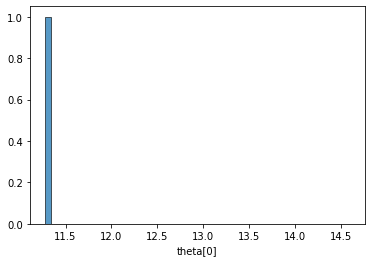

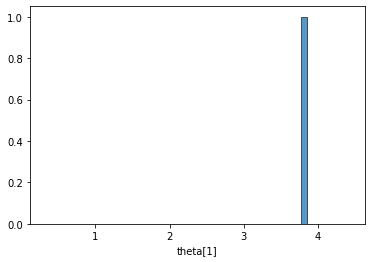

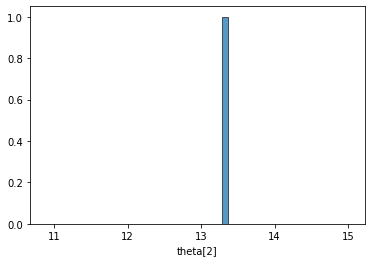

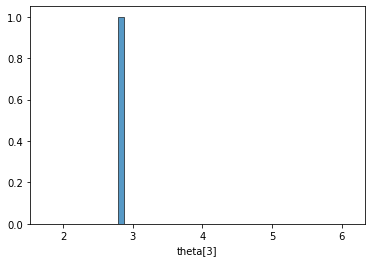

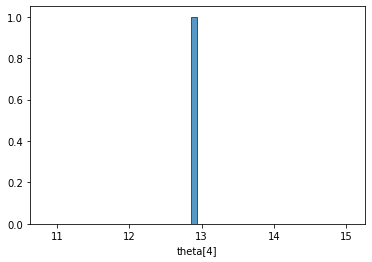

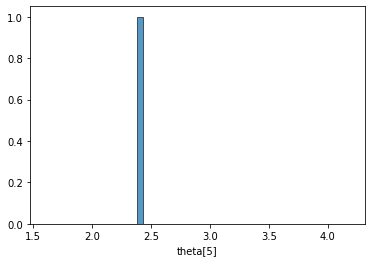

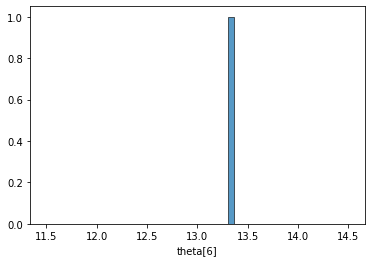

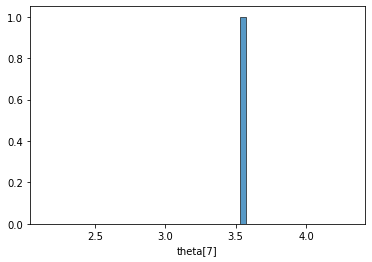

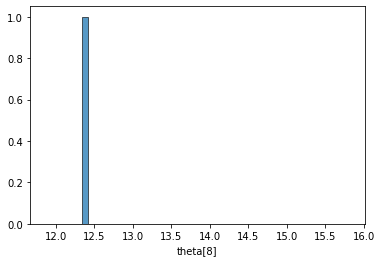

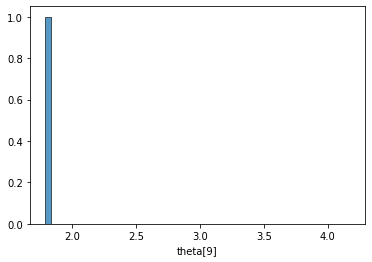

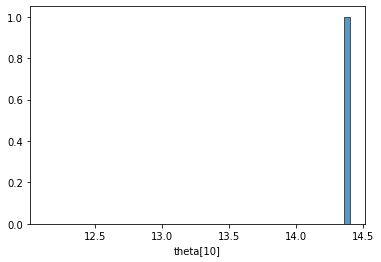

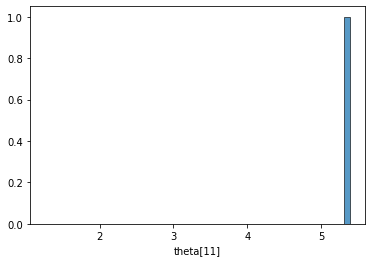

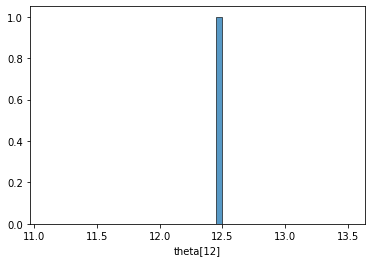

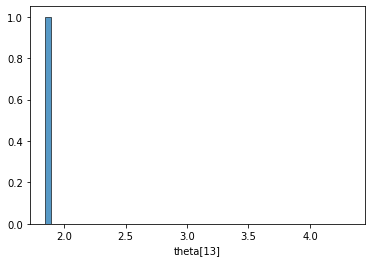

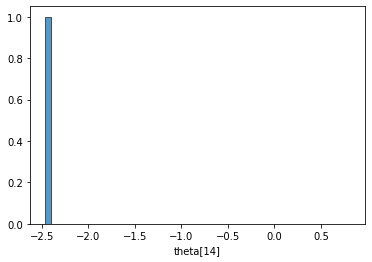

In [ ]:
# print(emp_marginal.log_weights)
# print(importance.get_normalized_weights())
# print(importance.get_ESS())
# print(importance.num_samples)

X_hist = emp_marginal.enumerate_support().T
weights = np.array(importance.get_normalized_weights())
for i in range(15):
    plt.figure()
    try:
        sns.histplot(x=X_hist[i], bins=50, weights=weights, kde=True)
    except:
        sns.histplot(x=X_hist[i], bins=50, weights=weights)
    plt.xlabel('theta[{}]'.format(i))
    plt.ylabel('')
print("done")

